![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
# SUGERIDO: Descomenta la siguiente linea de código si requieres instalar las libreías básicas utilizadas en este notebook
# Si requieres incluir más librerías puedes agregarlas al archivo Semana 4\requirements.txt
# !pip install -r requirements.txt

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
!pip install xgboost
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

<Axes: >

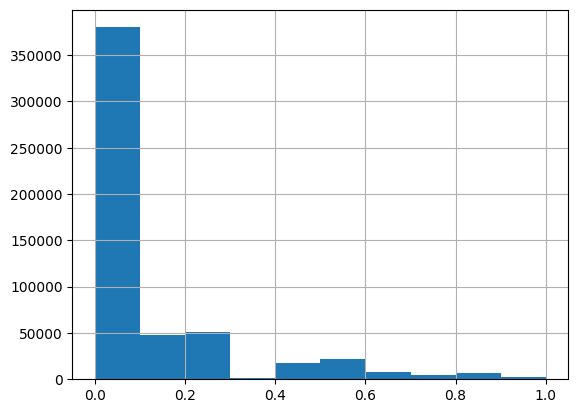

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

,target
count,541462.000000
mean,0.102991
std,0.196979
min,0.000000
25%,0.000000
50%,0.000000
75%,0.166667
max,1.000000


In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 1
vect_1 = CountVectorizer()
X_train_1 = vect_1.fit_transform(X_train)
X_test_1 = vect_1.transform(X_test)

### Modelo
model = XGBRegressor(tree_method='hist', n_estimators=100, max_depth=6)
model.fit(X_train_1, y_train)

### Predicción
y_pred=model.predict(X_test_1)

### MSE y R cuadrado
mse_1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse_1)
print("Coeficiente de determinación (R^2):", r2_1)

Error cuadrático medio (MSE): 0.020689791583810714
Coeficiente de determinación (R^2): 0.4699489081371663


En el anterior procedimiento el método CountVectorizer convierte texto en una matriz de conteo de palabras. En otras palabras, este método convierte el texto en vectores numéricos donde cada número indica el número de veces que aparece cada palabra en cada documento. Con esta metodología se entrenó un modelo de XGBoost de regresión. Al final, el modelo obtenido mostró un coeficiente de determinación del 46.99%, un puntaje bastante bajo para predecir la toxicidad del comentario.



## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 2
# Inicialización de CountVectorizer con trigramas
vect_2 = CountVectorizer(ngram_range=(1, 3), max_features=5000)

# Transformar los conjuntos de entrenamiento y prueba
X_train_2 = vect_2.fit_transform(X_train)
X_test_2 = vect_2.transform(X_test)

# Inicialización y entrenamiento del modelo XGBRegressor
model_2 = XGBRegressor(tree_method='hist', n_estimators=100, max_depth=6)
model_2.fit(X_train_2, y_train)

# Predicción
y_pred_2 = model_2.predict(X_test_2)

# Cálculo de MSE
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)
print(f"Error cuadrático medio (MSE): {mse_2}")
print(f"Coeficiente de determinación (R^2): {r2_2}")

Error cuadrático medio (MSE): 0.02423736327645469
Coeficiente de determinación (R^2): 0.3790637853204152


Ahora, usanto el mismo método, se crearon trigramas para entrenar el modelo de regresión con XGBoost. Con esto, se obtuvo un coeficiente de determinación del 37.91%, en este caso, inferior a la metodología anterior desarrollada.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

**TfidfVectorizer** es una técnica de vectorización de texto que se utiliza comúnmente en el procesamiento de lenguaje natural (NLP) para convertir un conjunto de documentos de texto en una matriz de características numéricas, donde cada característica representa la importancia de una palabra en un documento relativa al resto de documentos del corpus.

1. **Frecuencia de términos (TF):** TF mide la frecuencia de un término en un texto. Es decir mide cuantas veces aparece una palabra en un documento. Cuanto más frecuente sea un término en el texto, mayor será su valor TF para ese texto, evidenciando una relación directa.

$$TF(t,d)=\frac{numero~de~veces~que~t~aparece~en~d}{total~de~terminos~en~d}$$

2. **Frecuencia inversa de documento (IDF):** IDF mide la importancia de un término en el conjunto de textos. Los términos que aparecen en muchos textos tendrán un IDF más bajo, mientras que los términos que aparecen en pocos textos tendrán un IDF más alto. Es decir, mide cuán rara o común es una palabra en el conjunto total de documentos. Esto se calcula tomando el logaritmo del inverso de la frecuencia del documento que contiene el término y luego agregando 1 para evitar la división por cero.

$$IDF(t)=log \frac{1+n}{1+df(t)}+1 $$

Donde N = número total de documentos y df(t) = número de documentos que contienen el término t

3. **TFIDF**: La ponderación TF-IDF combina TF y IDF para calcular un valor ponderado para cada término en cada documento. Esto se hace multiplicando la frecuencia del término (TF) por la frecuencia inversa del documento (IDF). En sintesís, se se valora más a las palabras frecuentes en un documento pero raras en el corpus.

$$TF - IDF(t,d)= TF(t,d)*IDF(t) $$

**Ventajas**

* TfidfVectorizer tiene en cuenta no solo la frecuencia de los términos en un documento, sino también la importancia de esos términos en el conjunto de documentos. Esto puede ayudar a dar más peso a los términos que son únicos o raros en el corpus. Es decir, le da peso a Las palabras raras y distintivas reciben mayor peso. Pero, Reduce la influencia de palabras muy frecuentes pero poco informativas como “el”, “y”, “de”.

* Los términos que aparecen en muchos documentos suelen ser palabras comunes que pueden no ser muy informativas, reduciendi el peso de estos términos comunes asignándoles un valor IDF más bajo.

* Mejora el rendimiento en tareas como clasificación de texto y detección de spam.

* Esta metodología también normaliza las frecuencias de términos por la longitud del documento, lo que puede ayudar a manejar la variación en la longitud de los documentos.

**Desventajas:**

* Los valores TF-IDF no son tan intuitivos como simplemente contar la frecuencia de términos, generando una reducción en la interpretación para algunos casos.

* Palabras relevantes pero muy comunes pueden perder peso (lo cual no siempre es deseado).

* El cálculo de los valores TF-IDF puede ser más costoso computacionalmente en comparación con CountVectorizer, especialmente para corpus grandes.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 4
# Inicializar TfidfVectorizer
tfidf_vect = TfidfVectorizer()

# Transformar los conjuntos de entrenamiento y prueba
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Inicializar y entrenar el modelo XGBRegressor
model = XGBRegressor(tree_method='hist', n_estimators=100, max_depth=6)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

# Calcular MSE y R cuadrado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.020335956149285114
Coeficiente de determinación (R^2): 0.47901380652680536


Finalmente, con TfidfVectorizer se obtuvo un coeficiente de determinación del modelo de 47.90%, el más alto en comparación con las otras dos metodologías.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

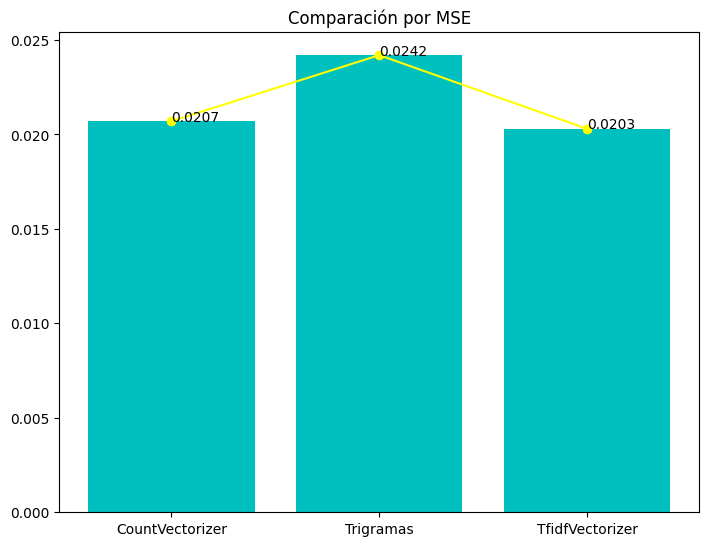

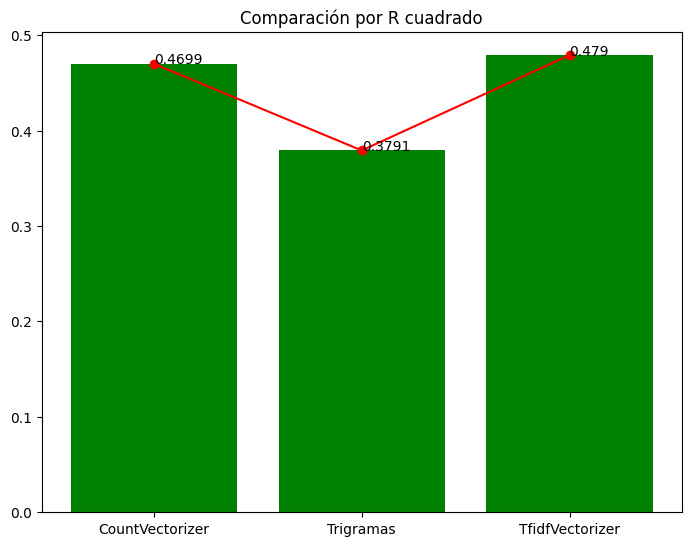

In [15]:
# Celda 5 Código para graficos y tablas comparativas
import matplotlib.pyplot as plt
import seaborn as sns


# Comparación por MSE
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación por MSE")
ejeX = ['CountVectorizer', 'Trigramas', 'TfidfVectorizer']
ejeY = [round(mse_1, 4), round(mse_2, 4), round(mse, 4)]
ax.plot(ejeX, ejeY, marker='o', color='yellow')
ax.bar(ejeX, ejeY, color="c")
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

# Comparación por R cuadrado
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación por R cuadrado")
ejeX = ['CountVectorizer', 'Trigramas', 'TfidfVectorizer']
ejeY = [round(r2_1, 4), round(r2_2, 4), round(r2, 4)]
ax.plot(ejeX, ejeY, marker='o', color='red')
ax.bar(ejeX, ejeY, color="g")
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()


Como puede observarse en las gráficas, realizar la regresión con el previo preprocesamiento de los textos con TfidfVectorizer permite minimizar el error cuadrático medio y obtener mayor coeficiente de determinación. Así, en este caso de estudio esta es la metodología de preprocesamiento de elección. Llama la atención que el modelo con trigramas tiene un menor rendimiento en este caso. Esto puede deberse a En tu caso, que notes mejor desempeño con trigramas sugiere que probablemente en este caso el problema depende del contexto local de las palabras, las frases de 3 palabras están capturando patrones que los unigramas no ven y el dataset probablemente tiene suficiente tamaño o no sufre tanto por el aumento de dimensionalidad. Adicionalmente, con los trigramas hay un mayor riesgo de overfitting. Finalmente, usando TfidfVectorizer el modelo tiene un mejor desempeño y puede deberse a que la frecuencia bruta de las palabras engañaba al modelo: con TF-IDF, aprende de las palabras/frases realmente distintivas, no de palabras vacías o frecuentes. En conclusión, se puede ver cómo en este caso las metodologías de preprocesamiento influyen en el rendimiento del modelo, siendo TF-IDF la más eficiente.

